<a href="https://colab.research.google.com/github/Harsh1091996/Global-Terrorism-Analysis/blob/main/Himanshu_Sharma_24_02_2021_%5BABTN0102%5DGlobal_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Abstract: 
With details on various dimensions of each attack, the GTD familiarizes analysts, policymakers, scholars, and journalists with patterns of terrorism. The GTD defines terrorist attacks as: The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation.

https://start.umd.edu/research-projects/global-terrorism-database-gtd

#Terrorism Definitions 
###International terrorism﻿: 
Violent, criminal acts committed by individuals and/or groups who are inspired by, or associated with, designated foreign terrorist organizations or nations (state-sponsored).

###Domestic terrorism: 
Violent, criminal acts committed by individuals and/or groups to further ideological goals stemming from domestic influences, such as those of a political, religious, social, racial, or environmental nature.

###Many factors have contributed to the evolution of the terrorism threat on both the international and domestic fronts, such as:

##Lone offenders: 
Terrorist threats have evolved from large-group conspiracies toward lone-offender attacks. These individuals often radicalize online and mobilize to violence quickly. Without a clear group affiliation or guidance, lone offenders are challenging to identify, investigate, and disrupt. 

##The Internet and social media:
 International and domestic violent extremists have developed an extensive presence on the Internet through messaging platforms and online images, videos, and publications. These facilitate the groups’ ability to radicalize and recruit individuals who are receptive to extremist messaging. 

 https://www.fbi.gov/investigate/terrorism

In [51]:
# Importing all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
warnings.filterwarnings("ignore")
%matplotlib inline

#What can we do about it? Clean and understand.💥
Simple. Our goal is to define ways to interpret and understand this information/data and present reasonable findings that might help alleviate the issue more. We can use our own form of helping through analysis and discussion. 

In [52]:
#Reading data
global_terror=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project/Global Terrorism Data.csv',encoding='ISO-8859-1')

#Characteristics of the GTD






*   Contains information on over 1,80,000 terrorist attacks
*   Currently the most comprehensive unclassified database on terrorist attacks in the world


*   Includes information on more than 95,000 bombings, 20,000 assassinations, and 15,000 kidnappings and hostage events since 1970
*   Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables








In [53]:
#Shape of DataSet
global_terror.shape

(181691, 135)

In [54]:
#Accessing top 5 rows of dataset
global_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#Data Cleaning

### Renaming all columns according to our convinience 

In [55]:
global_terror.rename(columns={'iyear':'Year','imonth':'Month','city':'City',
                   'iday':'Day','country':'Country_Code','country_txt':'Country_Name','region':'No_of_regions','region_txt':'Region',
                   'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                   'nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                   'motive':'Motive'},inplace=True)


###There are so many Null values column so we will be considering only Important Columns

In [56]:
#Introducing new column i.e Casualities
global_terror['Casualties'] = global_terror.Killed + global_terror.Wounded
global_terror=global_terror[['eventid','Year','Month','Day','Country_Code','Country_Name','extended','resolution','No_of_regions','Region','provstate','City','latitude',
                             'longitude','success','AttackType','Killed','Wounded','Casualties',
                             'Target','Group','Target_type','Weapon_type','ishostkid','Summary']]

In [57]:
global_terror.head()

,eventid,Year,Month,Day,Country_Code,Country_Name,extended,resolution,No_of_regions,Region,provstate,City,latitude,longitude,success,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type,ishostkid,Summary
0,197000000001,1970,7,2,58,Dominican Republic,0,NaN,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,0.0,NaN
1,197000000002,1970,0,0,130,Mexico,0,NaN,1,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,1.0,NaN
2,197001000001,1970,1,0,160,Philippines,0,NaN,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown,0.0,NaN
3,197001000002,1970,1,0,78,Greece,0,NaN,8,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,0.0,NaN
4,197001000003,1970,1,0,101,Japan,0,NaN,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,0.0,NaN


###Treating Null Values

In [58]:
global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   eventid        181691 non-null  int64  
 1   Year           181691 non-null  int64  
 2   Month          181691 non-null  int64  
 3   Day            181691 non-null  int64  
 4   Country_Code   181691 non-null  int64  
 5   Country_Name   181691 non-null  object 
 6   extended       181691 non-null  int64  
 7   resolution     2220 non-null    object 
 8   No_of_regions  181691 non-null  int64  
 9   Region         181691 non-null  object 
 10  provstate      181270 non-null  object 
 11  City           181257 non-null  object 
 12  latitude       177135 non-null  float64
 13  longitude      177134 non-null  float64
 14  success        181691 non-null  int64  
 15  AttackType     181691 non-null  object 
 16  Killed         171378 non-null  float64
 17  Wounded        165380 non-nul

#### Analyzing Null Values

In [59]:
#Fetching total number of null values in each column
global_terror.isnull().sum()

eventid               0
Year                  0
Month                 0
Day                   0
Country_Code          0
Country_Name          0
extended              0
resolution       179471
No_of_regions         0
Region                0
provstate           421
City                434
latitude           4556
longitude          4557
success               0
AttackType            0
Killed            10313
Wounded           16311
Casualties        16874
Target              636
Group                 0
Target_type           0
Weapon_type           0
ishostkid           178
Summary           66129
dtype: int64

###Filling NaN values
Killed,Wounded,Casualities,ishostkid these are the columns whose NaN values can be filled with zero 

In [60]:
global_terror['Killed'].fillna(0,inplace=True)
global_terror['Wounded'].fillna(0,inplace=True)
global_terror['Casualties'].fillna(0,inplace=True)
global_terror['ishostkid'].fillna(0,inplace=True)

###Information that can help us better understand the data and find some basic insights💥

In [61]:
# Region with most number  of terror attacks
print('The region of',global_terror['Region'].value_counts(dropna=True, ascending=False).index[0] , 'had the highest amount of Terrorist Attacks totalled at',global_terror['Region'].value_counts(dropna=True,  ascending=False).max(),'\n')

# Country with most number  of terror attacks
print('The most known country with terror attacks was' ,global_terror['Country_Name'].value_counts( ascending=False).index[0],'totalled at',global_terror['Country_Name'].value_counts( ascending=False).max(),'\n')

# City with most number  of terror attacks
print('The most known city that had terror attacks was' ,global_terror['City'].value_counts(dropna=True, ascending=False).index[1],'\n')

# weapon used mostly
print('The most used weapon in terror attacks was' ,global_terror['Weapon_type'].value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalled at',global_terror['Weapon_type'].value_counts(dropna=True, normalize=False, ascending=False).max(),'\n')

# most preferred method of attacking
print('The most preferred method of attack was',global_terror['AttackType'].value_counts(dropna=True,ascending=False).index[0],'totalling at',global_terror['AttackType'].value_counts(dropna=True,  ascending=False).max())

The region of Middle East & North Africa had the highest amount of Terrorist Attacks totalled at 50474 

The most known country with terror attacks was Iraq totalled at 24636 

The most known city that had terror attacks was Baghdad 

The most used weapon in terror attacks was Explosives totalled at 92426 

The most preferred method of attack was Bombing/Explosion totalling at 88255


#Number Of Terrorist Activities Each Year

In [62]:
# Counting terror activities each year
attack_count=global_terror.groupby('Year')['eventid'].count()
# Counting No of people killed each year
killed=global_terror.groupby('Year')['Killed'].sum()
# Counting No of people Injured each year
injured=global_terror.groupby('Year')['Wounded'].sum()

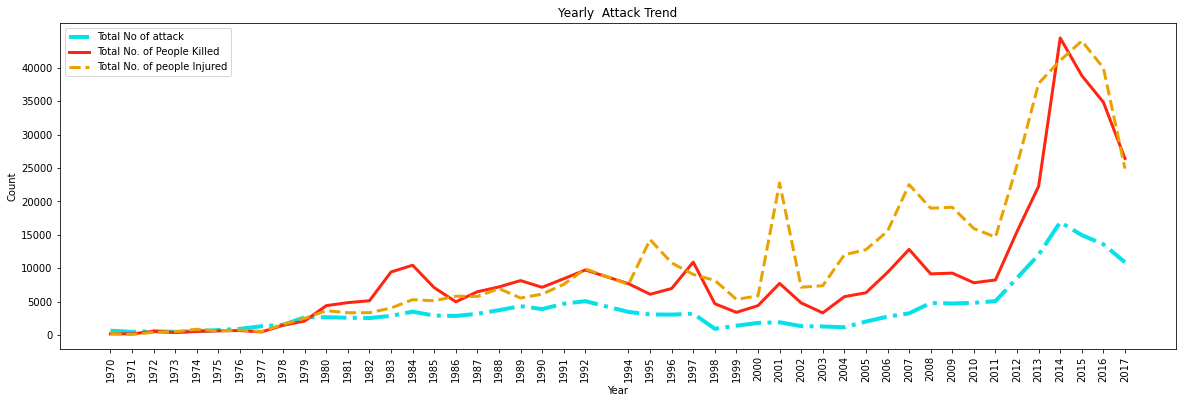

In [63]:
plt.subplots(figsize=(20,6)) #Figure Size
plt.plot( attack_count.index,attack_count.values , linestyle="-.", color='#05E0E9', linewidth=4,label='Total No of attack') 
plt.plot( killed.index, killed.values, marker='', color='#FF2511', linewidth=3,label='Total No. of People Killed')
plt.plot( injured.index, injured.values, marker='', color='#E9A200', linewidth=3, linestyle='dashed',label='Total No. of people Injured')
plt.xticks(rotation=90)
plt.xticks(attack_count.index)
plt.yticks(range(0,41000,5000))
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.title('Yearly  Attack Trend')
plt.show()

#**Interpreting:💥**
As we can see there is a sharp increase in Attacks during the period of 2011-2014, most number of attacks occured after 2011 with peak in 2014  and as a result Number of people getting injured or killed were also High.

##Total Numbers of attack in top 10 Terror Attacked Country

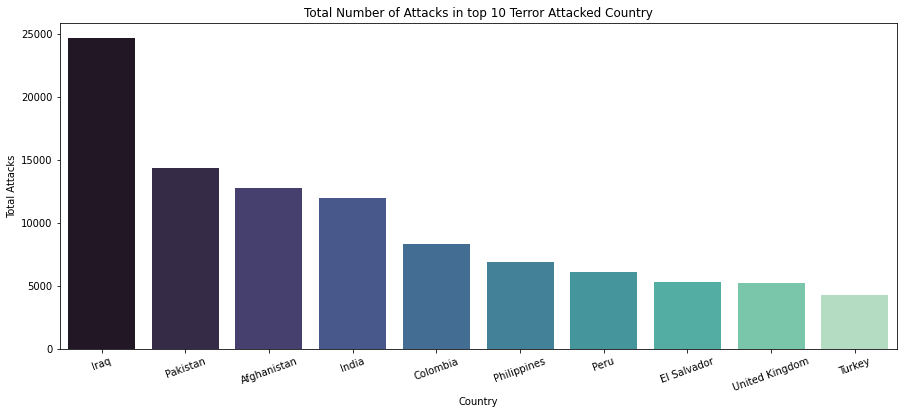

In [64]:
plt.subplots(figsize=(15,6))
country = global_terror.Country_Name.value_counts()[:10].reset_index()
country.columns = ['Country', 'Total Attacks']
sns.barplot(x=country.Country, y=country['Total Attacks'], palette= 'mako')
plt.xticks(rotation=20)
plt.title('Total Number of Attacks in top 10 Terror Attacked Country')
plt.show()

#**Interpreting:💥**
It makes sense that Iraq has one of the highest terror attacks since most of them originated from the middle east. Baghdad is the capital of Iraq.

#Number of Total Casualities in Top 10 Terror Attacked Country

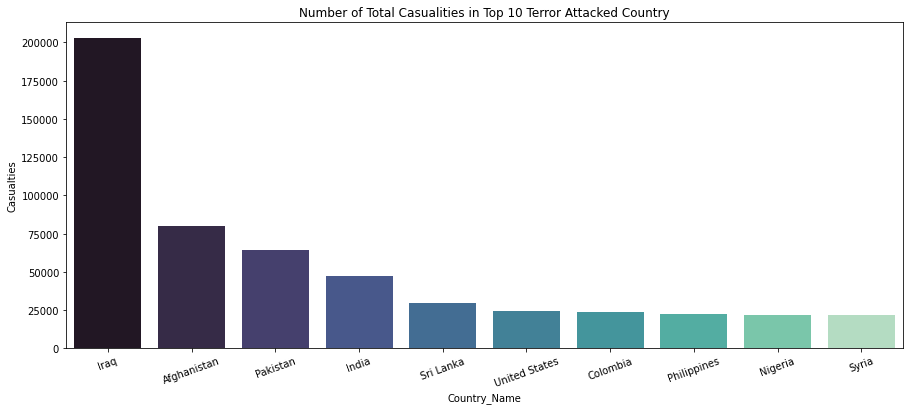

In [65]:
plt.subplots(figsize=(15,6))
Casualties = global_terror.groupby('Country_Name').Casualties.sum().to_frame().reset_index().sort_values('Casualties', ascending=False)[:10]
sns.barplot(x=Casualties.Country_Name, y=Casualties.Casualties, palette= 'mako')
plt.xticks(rotation=20)
plt.title('Number of Total Casualities in Top 10 Terror Attacked Country')
plt.show()

#**Interpreting:💥**
It's so obvious that Iraq is at the top for most number of casualties as Iraq has one of the highest terror attacks.

##Analysing types of attack

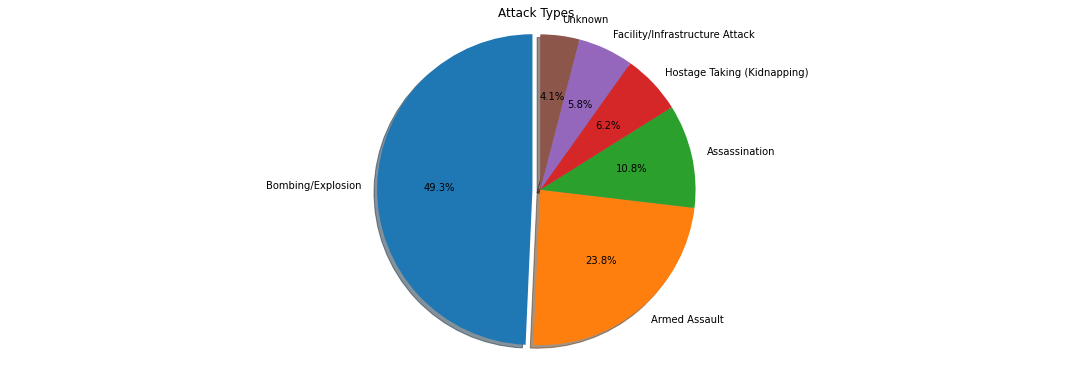

In [66]:
label1=global_terror['AttackType'].value_counts()[:6].index
size=global_terror['AttackType'].value_counts()[:6].values
explode = (0.05, 0, 0, 0,0,0) 
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.pie(size, explode=explode, labels=label1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.title('Attack Types')
plt.show()

#Interpreting:💥
 Explosives were the main type of weapon used in these attacks

#**Most Used Weapons for Terror Activities 💣**

In [67]:
weapons = global_terror['Weapon_type'].value_counts()
weapons = pd.DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon', 'Count']
weapons

,Weapon,Count
0,Explosives,92426
1,Firearms,58524
2,Unknown,15157
3,Incendiary,11135
4,Melee,3655
5,Chemical,321
6,Sabotage Equipment,141
7,Vehicle (not to include vehicle-borne explosiv...,136
8,Other,114
9,Biological,35


In [68]:
#Visualizing only top 6
weapons = global_terror['Weapon_type'].value_counts().nlargest(6)
weapons = pd.DataFrame(weapons)

weapons.reset_index(level=0, inplace=True)
weapons.columns = ['Weapon', 'Count']

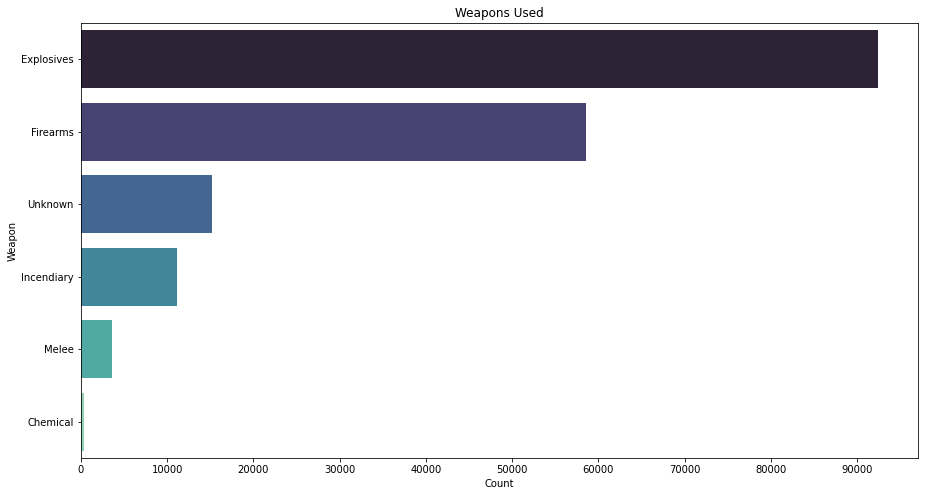

In [69]:
plt.subplots(figsize=(15,8))
sns.barplot(y=weapons.Weapon, x=weapons.Count, palette= 'mako')
plt.xticks(range(0,max(weapons.Count)+1,10000))
plt.title('Weapons Used')
plt.show()

#Interpreting:💥
Mostly explosives and firearms are used

##Conventional Terrorist Weapons

Terrorists are, on the whole, conventional in their use of weapons; bombs and guns are their favourites. Among the former, car- and truck-bombs have become very powerful weapons, especially in suicide attacks. Terrorists use both explosive bombings and incendiary bombings (e.g. Molotov cocktails). They also make use of letter and parcel bombs. Terrorists use guns, pistols, revolvers, rifles and (semi-) automatic weapons in assassinations, sniping, armed attacks and massacres. Grenades - from hand grenades to rocket-propelled - are also part of the terrorist arsenal. The use of missiles is rare but a few groups are known to be in possession of surface-to-air shoulder-fired missiles that can bring down helicopters, fighter aircrafts and civilian airliners.

https://www.unodc.org/images/odccp/terrorism_weapons_conventional.html

##***Which weapon has caused most number of casualties??💣***

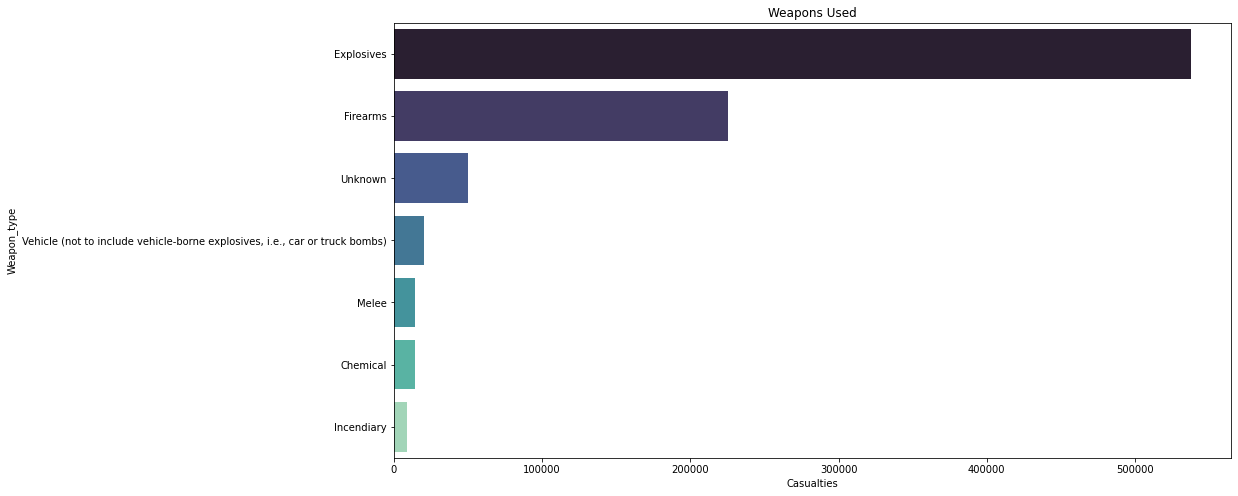

In [70]:
casualty_by_weapons=pd.DataFrame(global_terror.groupby('Weapon_type')['Casualties'].sum().sort_values(ascending=False).nlargest(7))
plt.subplots(figsize=(15,8))
ax=sns.barplot( x=casualty_by_weapons.Casualties,y=casualty_by_weapons.index, palette= 'mako')
plt.title('Weapons Used')
plt.show()

#Interpreting:💥
The top 2 weapons used which are explosives and firearms has caused most number of casualties.

Now lets find out how many attacks are Lethal.
#What is Lethal attack?
Attacks which caused death are considered as lethal attack or in other word we can just say it as deadly attacks.

#And Non Lethal attack?
Attacks which have'nt caused any death.


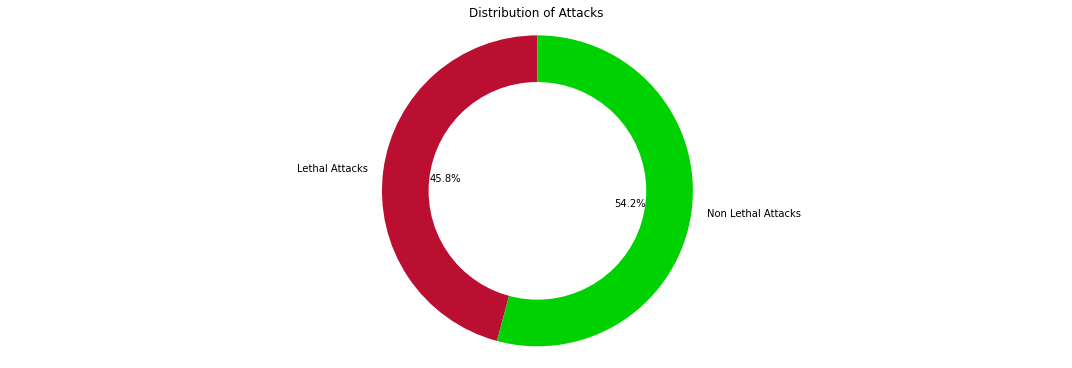

In [71]:
#Creating a dataframe after grouping on killed column
lethal=pd.DataFrame(global_terror.groupby('Killed')['eventid'].count())
lethal_count=0  #store no of lethal attacks
non_lethal_count=0  #store no of non lethal attacks
#iterating over data frame
for kill,row in lethal.iterrows():
  #checking for a particular attack whether someone was killed or not
  if kill==0:
    #if not killed then adding that to non_lethal
    non_lethal_count+=row['eventid']
  if kill>0:
    #if killed then adding that to lethal attack
    lethal_count+=row['eventid']

# Pie chart
labels = ['Lethal Attacks','Non Lethal Attacks']
sizes = [lethal_count,non_lethal_count]
#colors
colors = ['#BA0F30','#00D100']
 
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Distribution of Attacks')
plt.show()

#Interpreting:💥
 About half of all terrorist attacks in the GTD are non-lethal i.e they did'nt cause any fatalities

#***How much % of attacks involve 25 or more fatalities?***

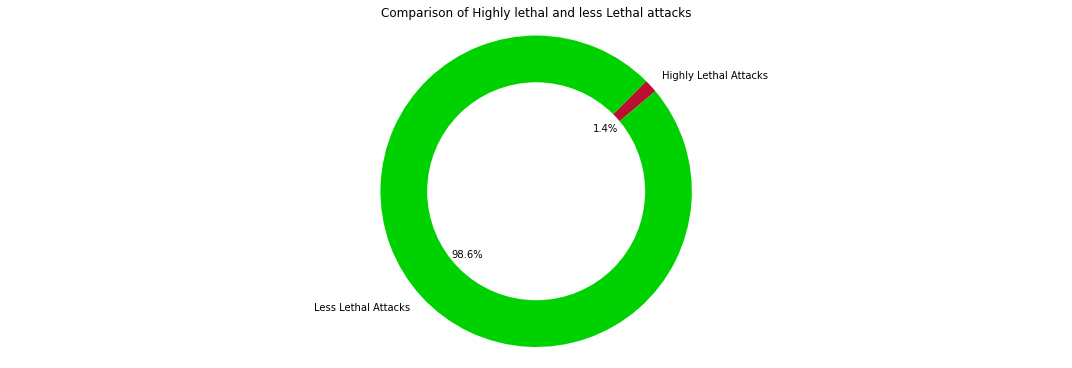

In [72]:
highly_lethal=0 #store number of attacks which have 25 or more fatalities
less_lethal=0  #store number attacks with less fatalities
#iterating over dataframe
for kill,row in lethal.iterrows():
  #checking if no.of kills are less then 25
  if kill<25:
    less_lethal+=row['eventid']
  else:
    highly_lethal+=row['eventid']

# Pie chart
labels = ['Highly Lethal Attacks','Less Lethal Attacks']
sizes = [highly_lethal,less_lethal]
#colors
colors = ['#BA0F30','#00D100']
 
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%', startangle=40)
#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Comparison of Highly lethal and less Lethal attacks')
plt.show()

#Interpreting:💥
approximately one percent of attacks involve 25 or more fatalities

#***Let's find out how many fatalities does this highly lethal attacks has caused***

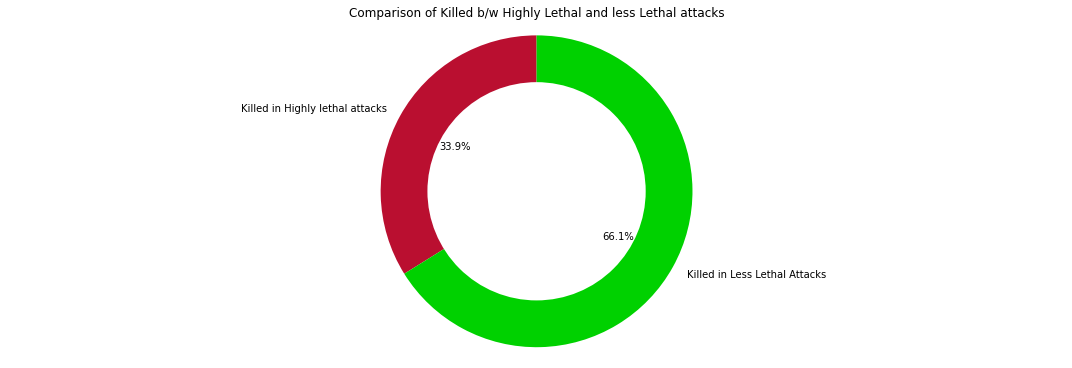

139506.0 People were killed in Highly Lethal Attacks
272362.0 People were killed in Less Lethal Attacks


In [73]:
highly_lethal_kill=0 # store no. of kills in highly lethal attacks
less_lethal_kill=0 #store no. of kills in less lethal attacks
#iterating over dataframe
for kill,row in lethal.iterrows():
  if kill<25:
    less_lethal_kill+=row['eventid']*kill
  else:
    highly_lethal_kill+=row['eventid']*kill

# Pie chart
labels = ['Killed in Highly lethal attacks','Killed in Less Lethal Attacks']
sizes = [highly_lethal_kill,less_lethal_kill]
#colors
colors = ['#BA0F30','#00D100']
 
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Comparison of Killed b/w Highly Lethal and less Lethal attacks')
plt.show()

print(f"{highly_lethal_kill} People were killed in Highly Lethal Attacks")
print(f"{less_lethal_kill} People were killed in Less Lethal Attacks")

#Interpreting:💥
These highly lethal attacks killed more than 139,000 people in total between 1970 and 2017. Which is around 33% of total fatalities caused.

#***Analysing Terrorist organization group***

In [74]:
#finding casualties caused by each group and which are the top 10 terror organization
global_terror.groupby('Group')['Casualties'].sum().nlargest(10)

Group
Unknown                                        313997.0
Islamic State of Iraq and the Levant (ISIL)     58223.0
Taliban                                         54459.0
Al-Qaida                                        28340.0
Liberation Tigers of Tamil Eelam (LTTE)         20859.0
Boko Haram                                      20305.0
Tehrik-i-Taliban Pakistan (TTP)                 15314.0
Al-Shabaab                                      14541.0
Al-Qaida in Iraq                                14410.0
Shining Path (SL)                               14059.0
Name: Casualties, dtype: float64

In [75]:
#Creating copy of data
terror_group=global_terror.copy()

In [76]:
# removing the rows which contain value 'Unknown' for terror group
terror_group=terror_group[terror_group['Group']!='Unknown']

In [77]:
top_10_terror_group=terror_group.groupby('Group')['Casualties'].sum().nlargest(10)

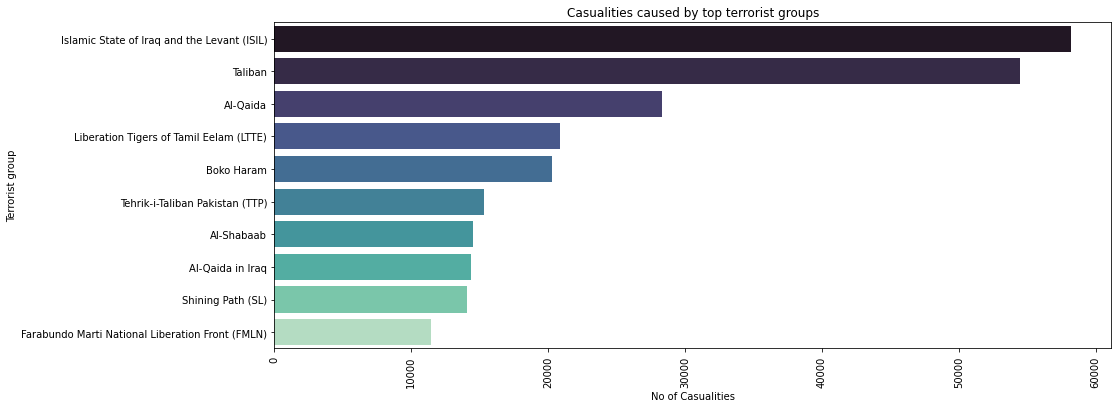

In [78]:
plt.subplots(figsize=(15,6))
sns.barplot(y=top_10_terror_group.index, x=top_10_terror_group.values, palette= 'mako')
plt.xticks(rotation=90)
plt.ylabel('Terrorist group')
plt.xlabel('No of Casualities')
plt.title('Casualities caused by top terrorist groups')
plt.show()

#***Comparing top 20 terror groups with other terrorist groups***

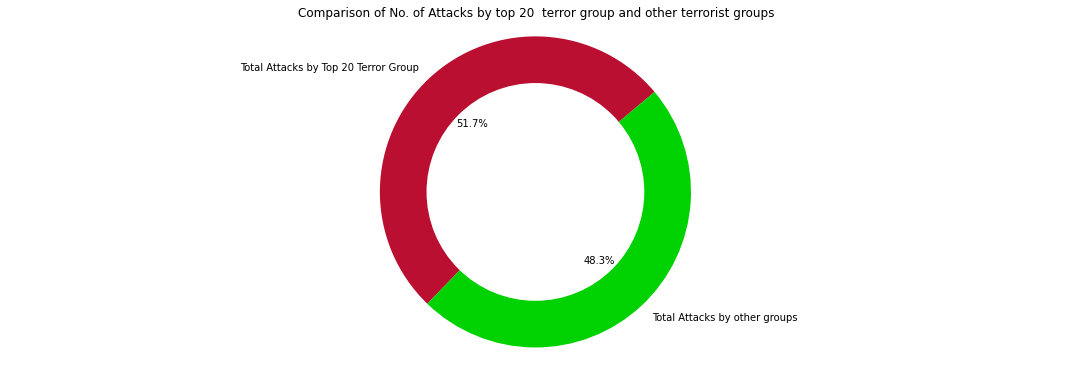

51095 Attacks by top 20 groups
47814 Attack by other groups


In [79]:
#Extracting top20 terror groups and their number of attacks
top_20_terror_group=pd.DataFrame(terror_group.groupby('Group')['eventid'].count().nlargest(20))
attack_sum_20=0 #store total number of attacks
group_20=[] #store terrorist group names
#iterating over dataframe
for group,count in top_20_terror_group.iterrows():
  attack_sum_20+=count['eventid'] #summing number of attacks of top20 in total
new=pd.DataFrame(terror_group.groupby('Group')['eventid'].count()) #dataframe stores count of each group terror attack
all_sum=0
#iterating over dataframe
for group,count in new.iterrows():
  all_sum+=count['eventid'] # store sum of total_attacks
other_attack=all_sum-attack_sum_20 #finding the differnce
# Pie chart
labels = ['Total Attacks by Top 20 Terror Group','Total Attacks by other groups']
sizes = [attack_sum_20,other_attack]
#colors
colors = ['#BA0F30','#00D100']

fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%', startangle=40)
#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Comparison of No. of Attacks by top 20  terror group and other terrorist groups')
plt.show()
print(f"{attack_sum_20} Attacks by top 20 groups")
print(f"{other_attack} Attack by other groups")

In [80]:
terror_group=pd.DataFrame(terror_group.groupby(['Group','Year'])['eventid'].count())

In [81]:
currently_active={}
group_list=[]
attack_count=[]
for group,count in terror_group.iterrows():
  if group[1]>2014:
    if group[0] not in group_list:
      group_list.append(group[0])
      attack_count.append(count['eventid'])
    else:
      indx=group_list.index(group[0])
      attack_count[indx]+=count['eventid']
currently_active['Group']=group_list
currently_active['Attack_Count']=attack_count
Currently_Active_df=pd.DataFrame(currently_active)
print(f"From the total of {global_terror['Group'].nunique()-1} The currently terror active groups are  {Currently_Active_df['Group'].count()}")

From the total of 3536 The currently terror active groups are  623


#***Terrorist group trend yearly***

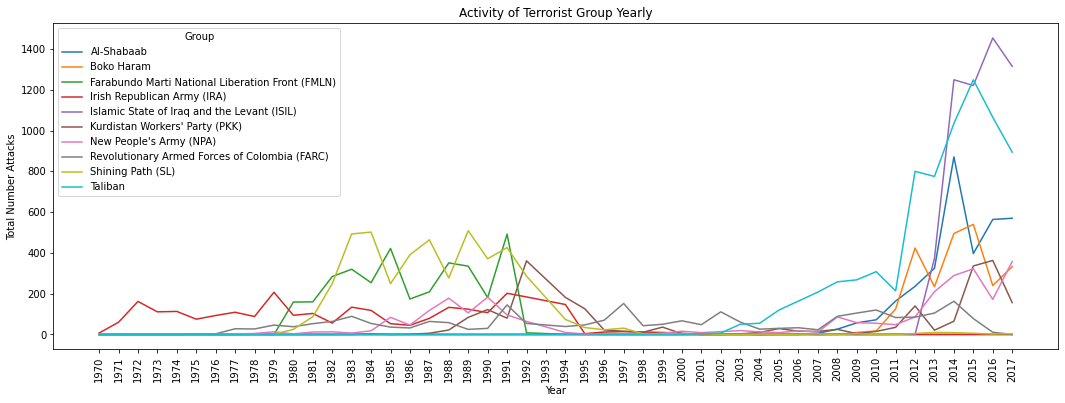

In [82]:
top10group = global_terror[global_terror.Group.isin(global_terror.Group.value_counts()[1:11].index)]
pd.crosstab(top10group.Year, top10group.Group).plot(color=sns.color_palette('tab10', 10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(range(1970, 2018, 1))
plt.xticks(rotation = 90)
plt.ylabel('Total Number Attacks') 
plt.title('Activity of Terrorist Group Yearly')
plt.show()

#Interpreting:💥
FMLN,SL were two main group attacking before 1998, FMLN group has not done any terror activity after 1992 and SL has also not been active since 1998 .
Taliban Started Attacking from 2002 and after that there was a sharp rise in their terror activities
Also ISIL started it's terror activities in 2012 and shown a huge amount of terror aactivities,In the year 2016 ISIL did the maximum number of terror activities.

# Visualising Terror Activities on Geographical Maps🌎

In [83]:
#Note: Here we are using only top 3000 rows so that the map does'nt look mess up
geog1 = global_terror.head(3000)

In [84]:
fig = px.scatter_mapbox(geog1, lat='latitude', lon='longitude', hover_name="City", hover_data=['Year','Weapon_type','Casualties','provstate','Group','success'],
                        color_discrete_sequence=["#ffae42 "], zoom=1, height=450)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":30,"t":0,"l":30,"b":0})
fig.show()

#Note: Hover over particular city on a map and you can see the details of Terror activities happened there such as:
1.Year
2.Weapon_type
3.Casualities
4.provstate
5.Group
6.success


#**WordCloud of Summary of Attacks**

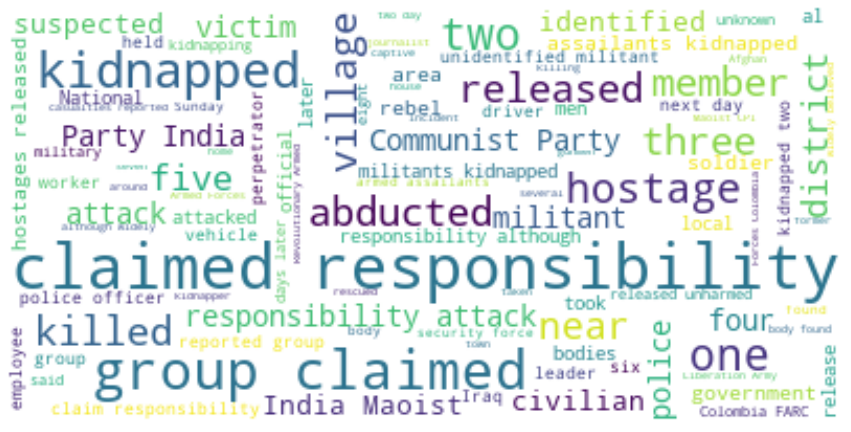

In [85]:

global_terror_summary=global_terror.dropna()
text = str(global_terror_summary.Summary.values)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#***CONCLUSION:***
1.The most known country with terror attacks was Iraq

2.The most used weapon in terror attacks was Explosives

3.The most preferred method of attack was Bombing/Explosion

4.Most number of attacks occured after 2011 with peak in 2014 

5.The top 2 weapons used which are explosives and firearms has caused most number of casualties.

6.About half of all terrorist attacks in the GTD are non-lethal

7.Approximately one percent of attacks involve 25 or more fatalities

8.Highly lethal attacks killed more than 139,000 people in total between 1970 
and 2017. Which is around 33% of total fatalities caused.

9.From the total of 3536 The currently terror active groups are  623

10.FLMN and SL were terrorist groups which are not active since 1998

11.Taliban Started Attacking from 2002 and after that there was a sharp rise in their terror activities

12.ISIL started it's terror activities in 2012 and shown a huge amount of terror aactivities,In the year 2016 ISIL did the maximum number of terror activities.
